# Credit Card Fraud EDA
This notebook performs detailed exploratory data analysis (EDA) on the Kaggle Credit Card Fraud dataset to uncover insights beyond formal modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('creditcard.csv')
# Feature engineering
df['LogAmount'] = np.log1p(df['Amount'])

## 1. Missing Values & Summary Statistics

In [3]:
print('Missing values per column:')
print(df.isnull().sum())
print('\nSummary statistics:')
print(df.describe())

Missing values per column:
Time         0
V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          1
V14          1
V15          1
V16          1
V17          1
V18          1
V19          1
V20          1
V21          1
V22          1
V23          1
V24          1
V25          1
V26          1
V27          1
V28          1
Amount       1
Class        1
LogAmount    1
dtype: int64

Summary statistics:
               Time            V1            V2            V3            V4  \
count  95162.000000  95162.000000  95162.000000  95162.000000  95162.000000   
mean   41220.807318     -0.264142     -0.037406      0.676465      0.162307   
std    16579.974524      1.867765      1.662025      1.335794      1.352735   
min        0.000000    -56.407510    -72.715728    -33.680984     -5.172595   
25%    32919.250000     -1.028614     -0.603497      0.178324   

## Data Cleaning
Remove duplicates and impute any missing values.

## 2. Class Distribution

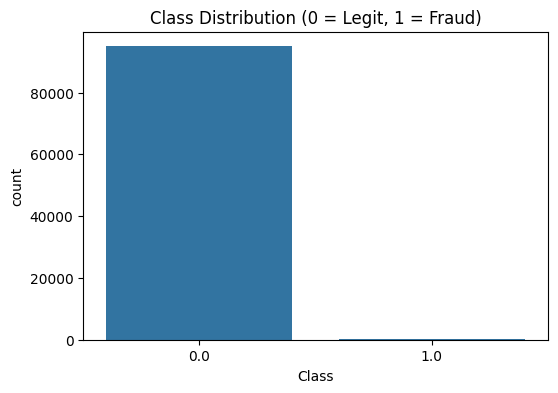

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.show()

## 3. Distribution of Log(Amount)

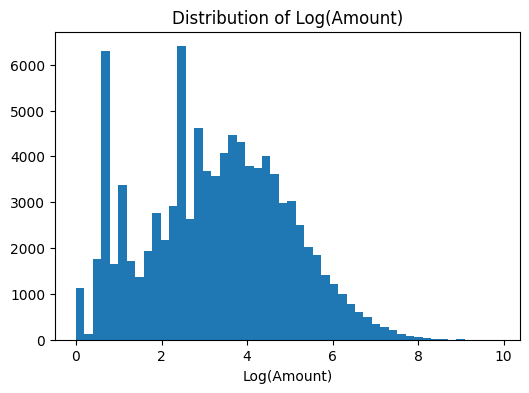

In [5]:
plt.figure(figsize=(6,4))
plt.hist(df['LogAmount'], bins=50)
plt.title('Distribution of Log(Amount)')
plt.xlabel('Log(Amount)')
plt.show()

## 4. Distribution of Transaction Time

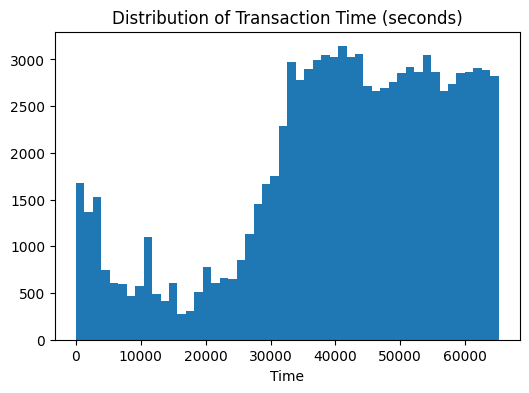

In [6]:
plt.figure(figsize=(6,4))
plt.hist(df['Time'], bins=50)
plt.title('Distribution of Transaction Time (seconds)')
plt.xlabel('Time')
plt.show()

## 5. Boxplot of Log(Amount) by Class

<ipython-input-7-9ba19069a414>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([legit, fraud], labels=['Legit', 'Fraud'])


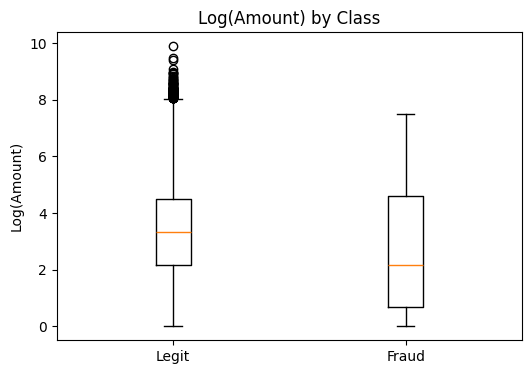

In [7]:
legit = df[df['Class']==0]['LogAmount']
fraud = df[df['Class']==1]['LogAmount']
plt.figure(figsize=(6,4))
plt.boxplot([legit, fraud], labels=['Legit', 'Fraud'])
plt.title('Log(Amount) by Class')
plt.ylabel('Log(Amount)')
plt.show()

## 6. Top 10 Features by Absolute Correlation with Class

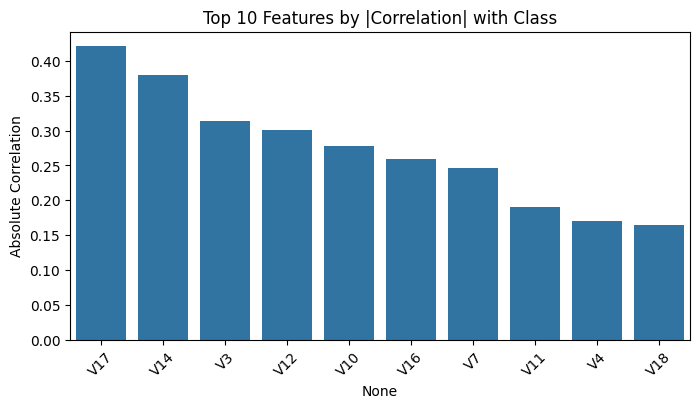

In [8]:
corr = df.corr()['Class'].abs().drop('Class')
top10 = corr.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top10.index, y=top10.values)
plt.title('Top 10 Features by |Correlation| with Class')
plt.xticks(rotation=45)
plt.ylabel('Absolute Correlation')
plt.show()

## 7. Mean Feature Values by Class for Top Features

<Figure size 800x600 with 0 Axes>

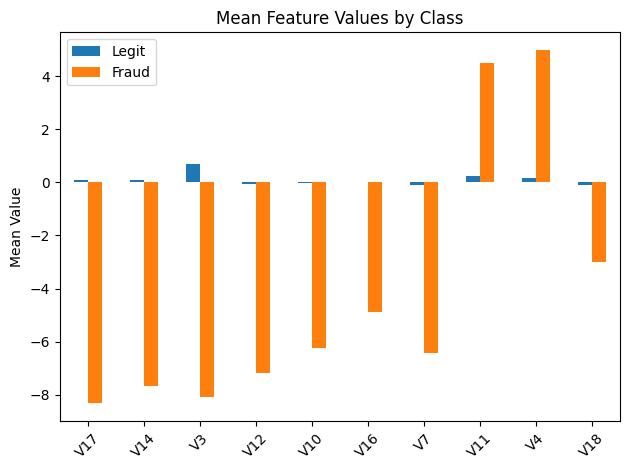

In [9]:
top_feats = top10.index.tolist()
means = df.groupby('Class')[top_feats].mean().T
plt.figure(figsize=(8,6))
means.plot(kind='bar')
plt.title('Mean Feature Values by Class')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(['Legit','Fraud'])
plt.tight_layout()
plt.show()

## 8. Transactions per Hour by Class

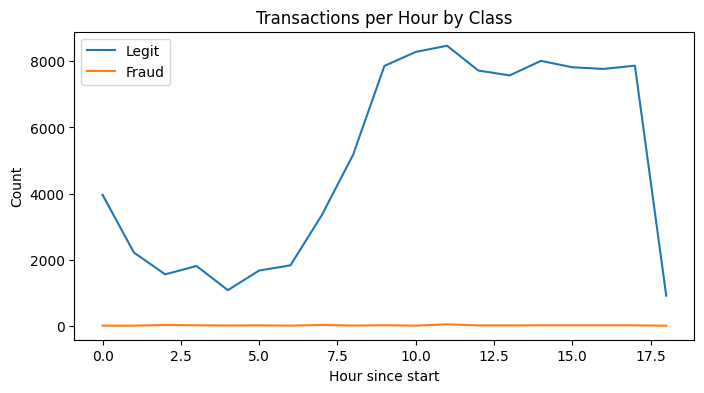

In [10]:
df['Hour'] = (df['Time'] // 3600).astype(int)
hourly = df.groupby(['Hour','Class']).size().unstack(fill_value=0)
plt.figure(figsize=(8,4))
plt.plot(hourly.index, hourly[0], label='Legit')
plt.plot(hourly.index, hourly[1], label='Fraud')
plt.title('Transactions per Hour by Class')
plt.xlabel('Hour since start')
plt.ylabel('Count')
plt.legend()
plt.show()

## 9. Correlation Heatmap of Top Features

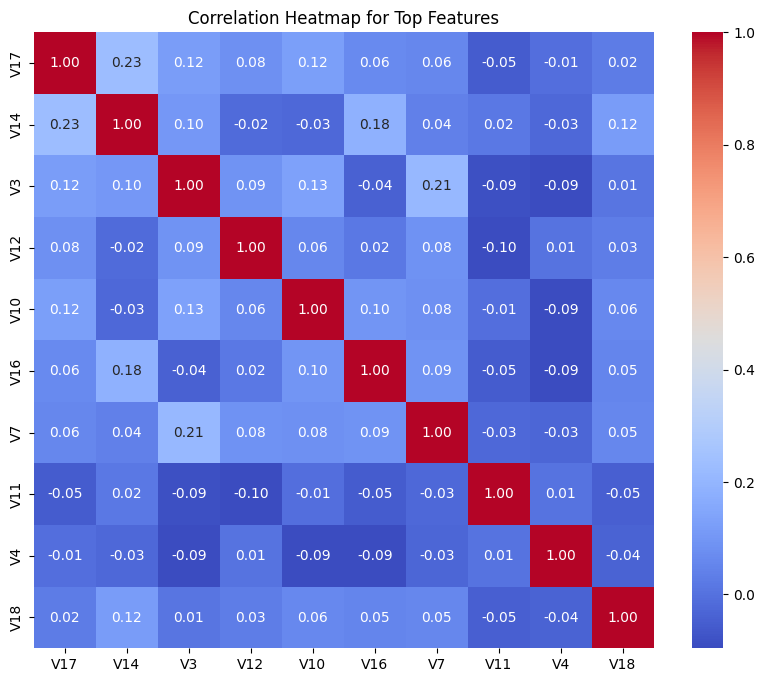

In [11]:
# Compute correlations for top features
top_feats = top10.index.tolist()  # from earlier cell
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_feats].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Top Features')
plt.show()

## 10. Pairplot of Key Features

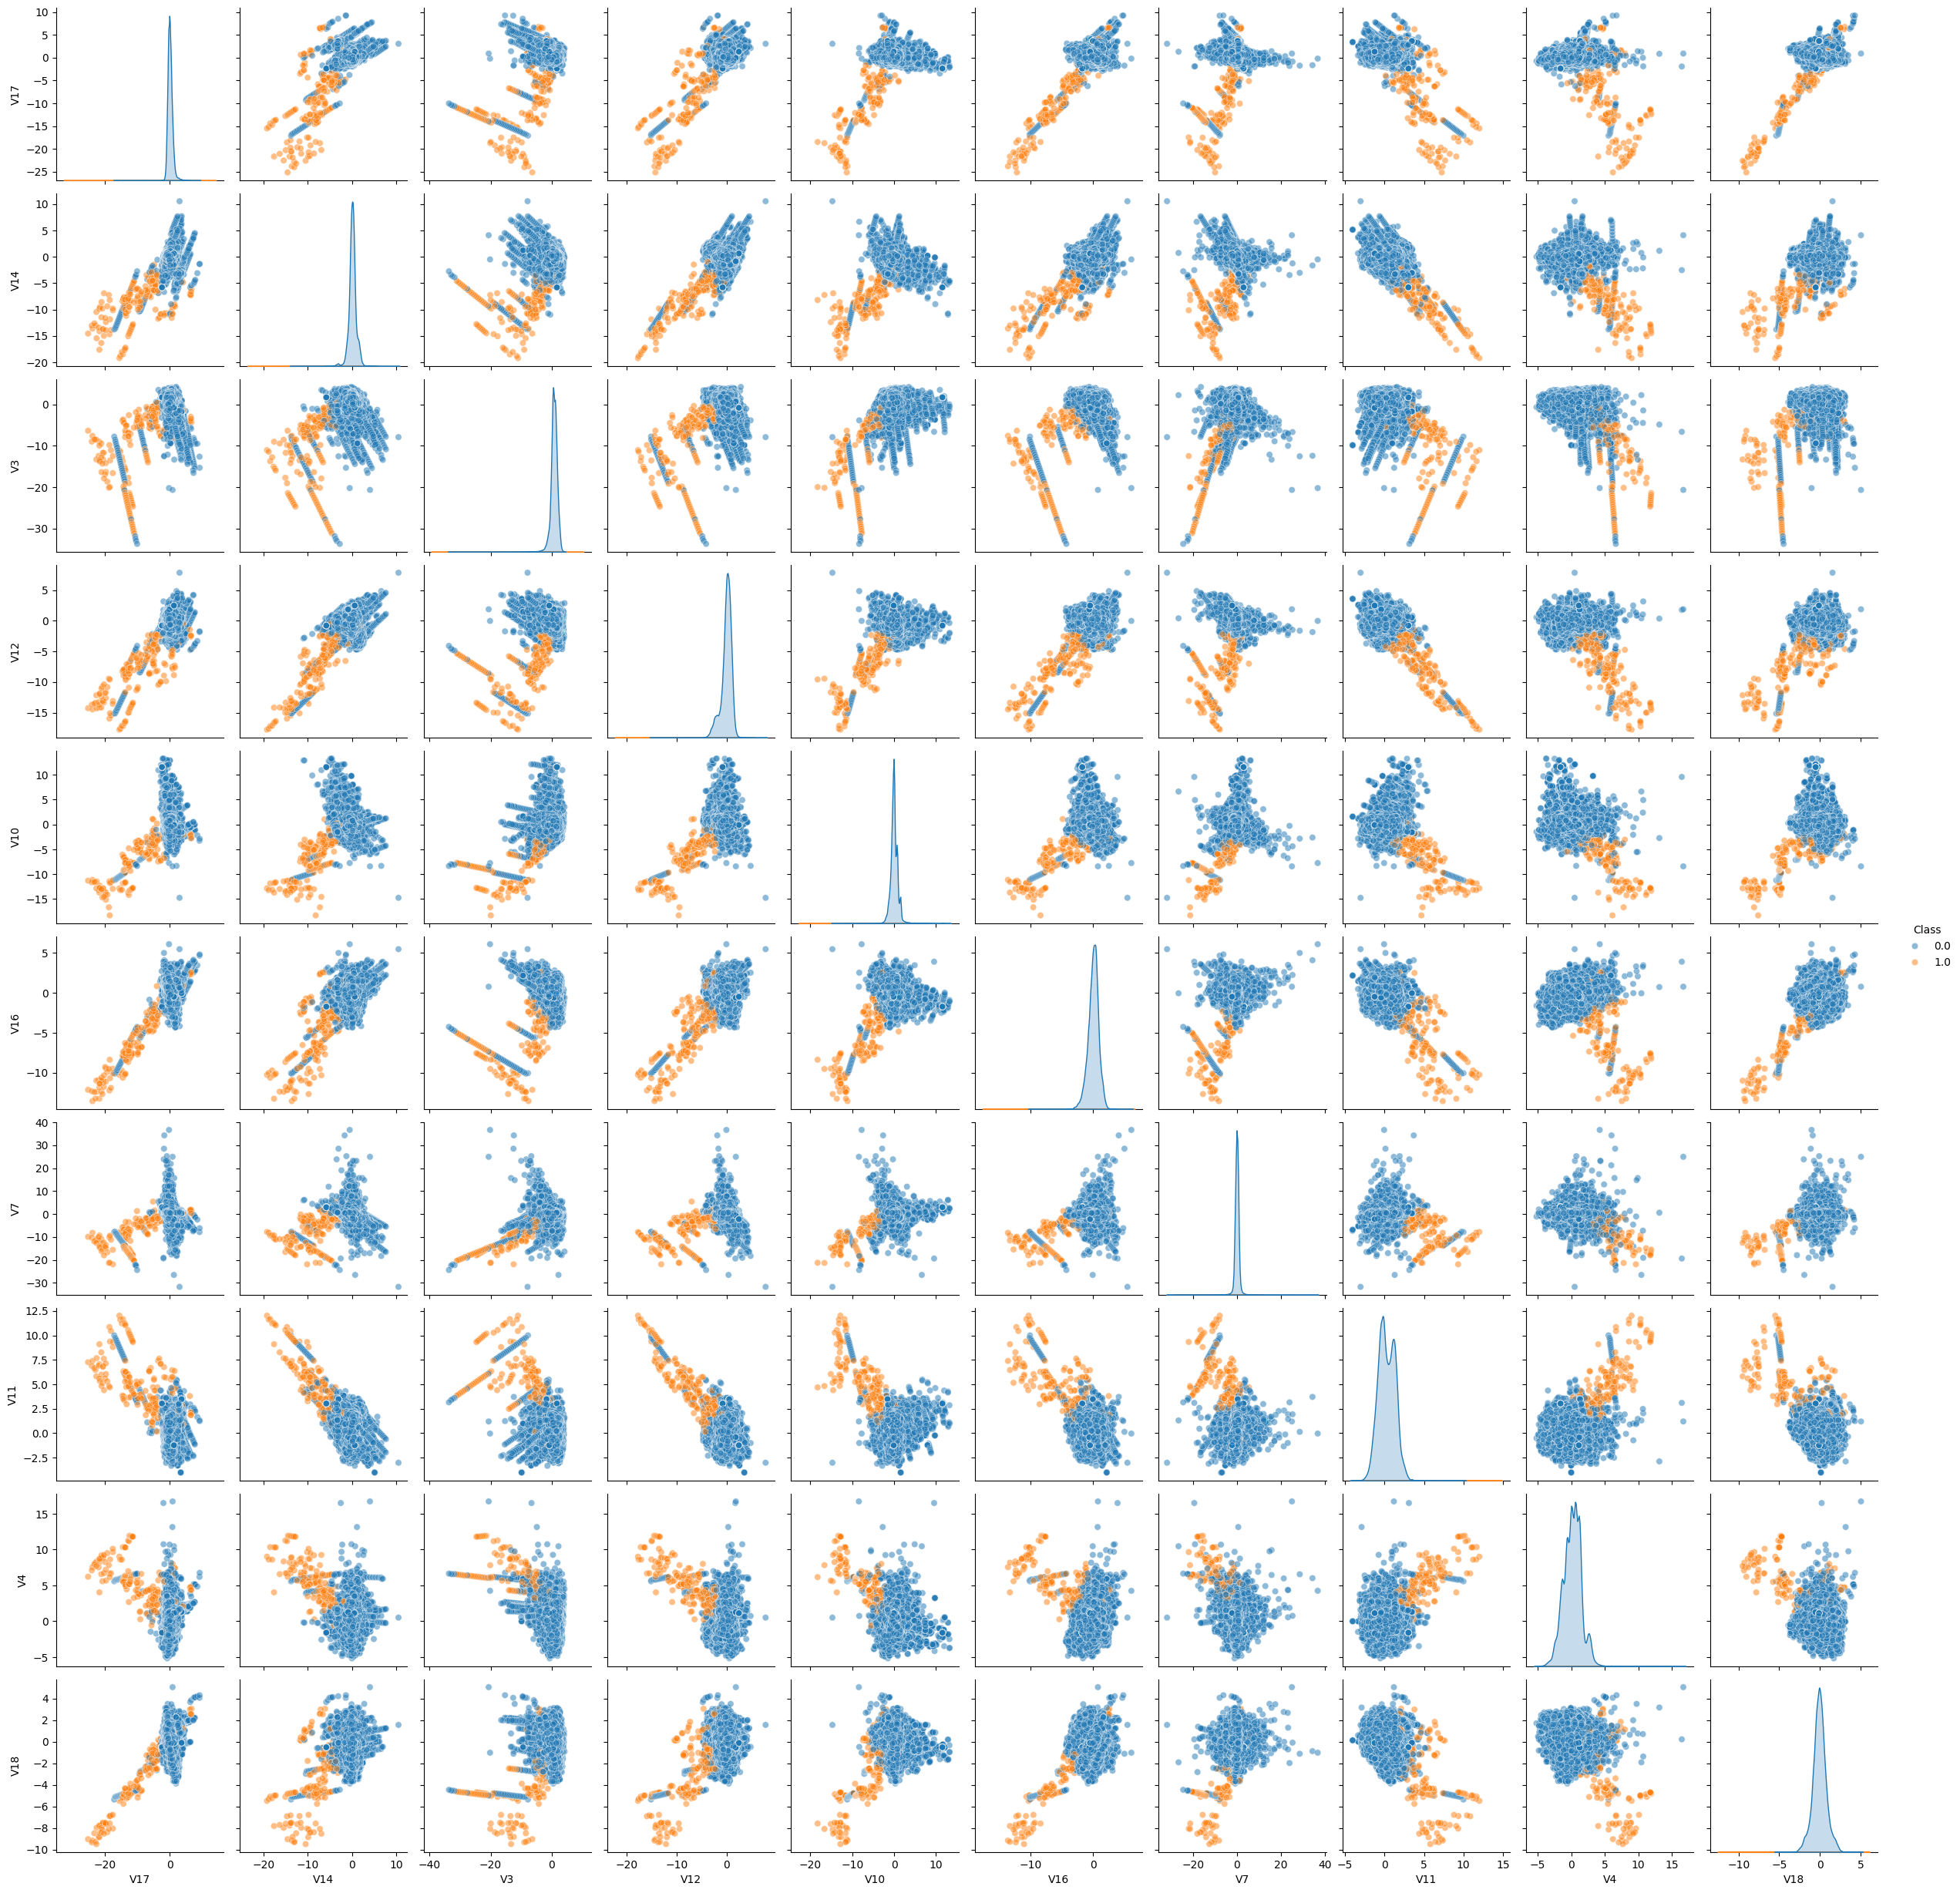

In [12]:
# Pairplot for top features to explore interactions
sns.pairplot(df[top_feats + ['Class']], hue='Class', vars=top_feats, plot_kws={'alpha':0.5}, diag_kind='kde')
plt.show()

## 11. Scatter Plot: Log(Amount) vs V17 by Class

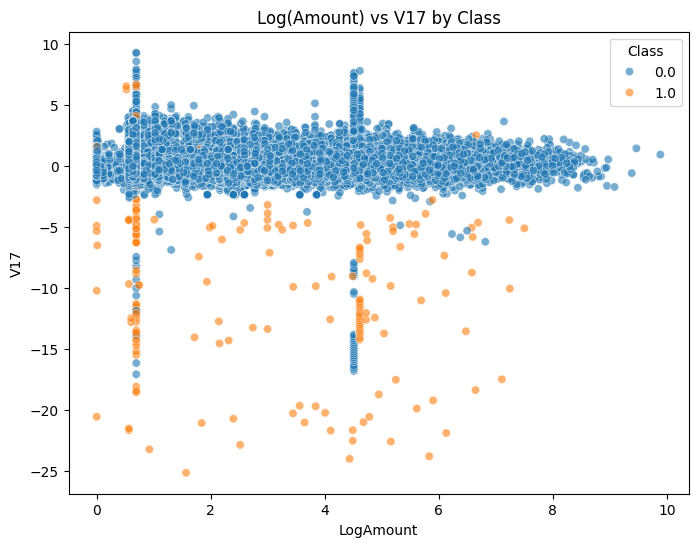

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LogAmount', y='V17', hue='Class', data=df, alpha=0.6)
plt.title('Log(Amount) vs V17 by Class')
plt.show()

## 12. Cumulative Fraud Transactions Over Time

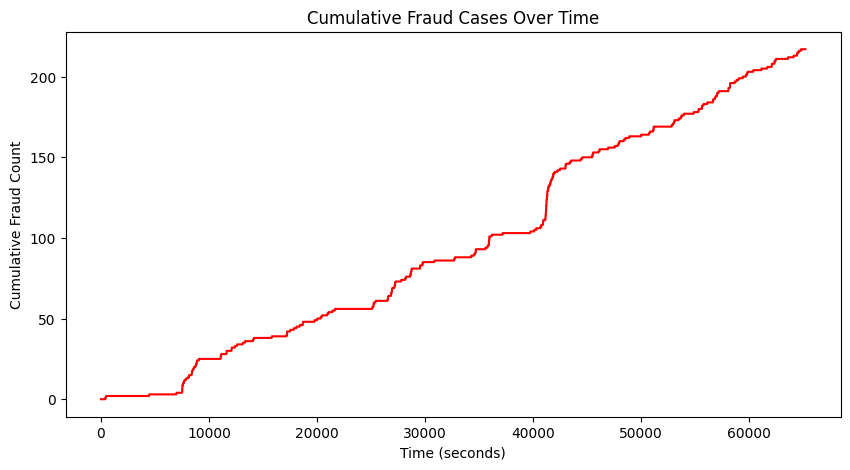

In [14]:
# Cumulative sum of fraud cases over time
df_sorted = df.sort_values('Time')
df_sorted['CumulativeFraud'] = df_sorted['Class'].cumsum()
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['Time'], df_sorted['CumulativeFraud'], color='red')
plt.title('Cumulative Fraud Cases Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Fraud Count')
plt.show()

## 13. Feature Interaction: V14 vs V17 Colored by Class

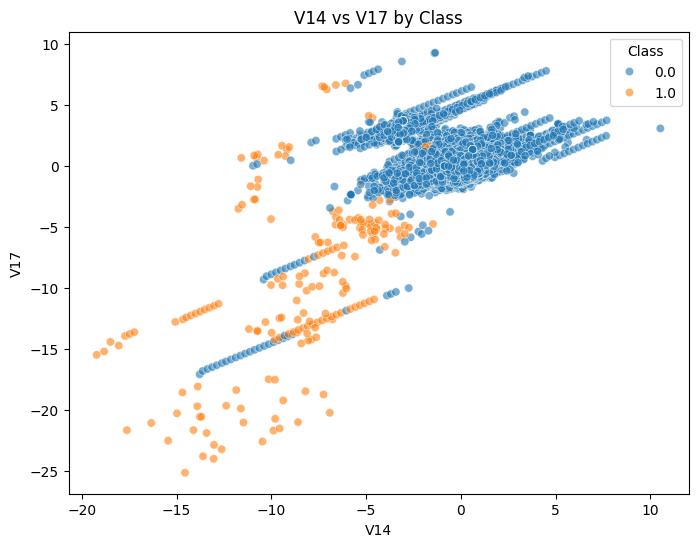

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='V14', y='V17', hue='Class', data=df, alpha=0.6)
plt.title('V14 vs V17 by Class')
plt.show()

## 14. Fraud Rate by Transaction Amount Bins

<ipython-input-16-c633c18c5836>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_rates = df.groupby('AmountBin')['Class'].mean()


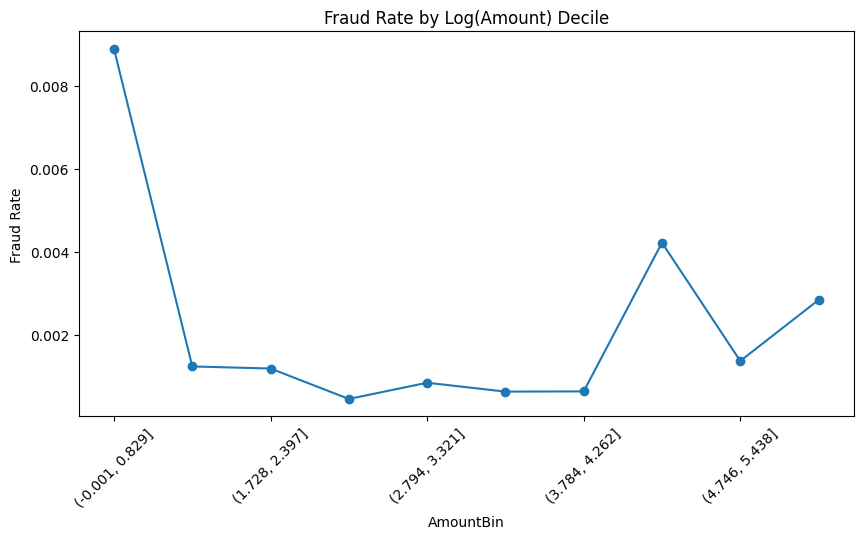

In [16]:
# Create bins for LogAmount and compute fraud rate
df['AmountBin'] = pd.qcut(df['LogAmount'], q=10)
bin_rates = df.groupby('AmountBin')['Class'].mean()
plt.figure(figsize=(10,5))
bin_rates.plot(marker='o')
plt.title('Fraud Rate by Log(Amount) Decile')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

## 15. Hour-of-Day Fraud Rate

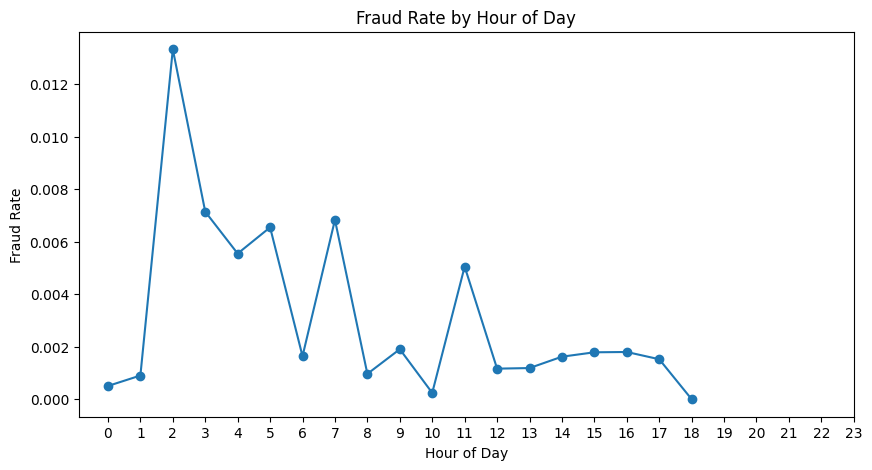

In [17]:
# Convert to hour of day and compute fraud rate
df['Hour24'] = ((df['Time'] // 3600) % 24).astype(int)
hourly_rate = df.groupby('Hour24')['Class'].mean()
plt.figure(figsize=(10,5))
hourly_rate.plot(marker='o')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.xticks(range(0,24))
plt.show()

## 16. PCA Projection of Transactions

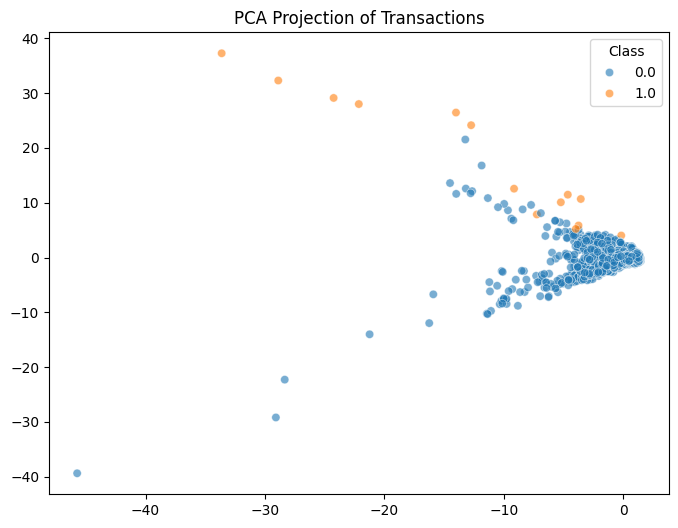

In [18]:
from sklearn.decomposition import PCA
# Sample for performance
sample = df.sample(n=5000, random_state=42)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(sample[[f'V{i}' for i in range(1,29)]])
plt.figure(figsize=(8,6))
sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=sample['Class'], alpha=0.6)
plt.title('PCA Projection of Transactions')
plt.show()

## 17. t-SNE Projection of Transactions

In [19]:
from sklearn.manifold import TSNE# Sample subset for performancesample = df.sample(n=5000, random_state=42)features = sample[[f'V{i}' for i in range(1,29)]].valuestsne = TSNE(n_components=2, random_state=42, perplexity=30)coords = tsne.fit_transform(features)plt.figure(figsize=(8,6))sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=sample['Class'], alpha=0.6)plt.title('t-SNE Projection of Transactions')plt.show()

## 18. Violin Plots of Key Features by Class

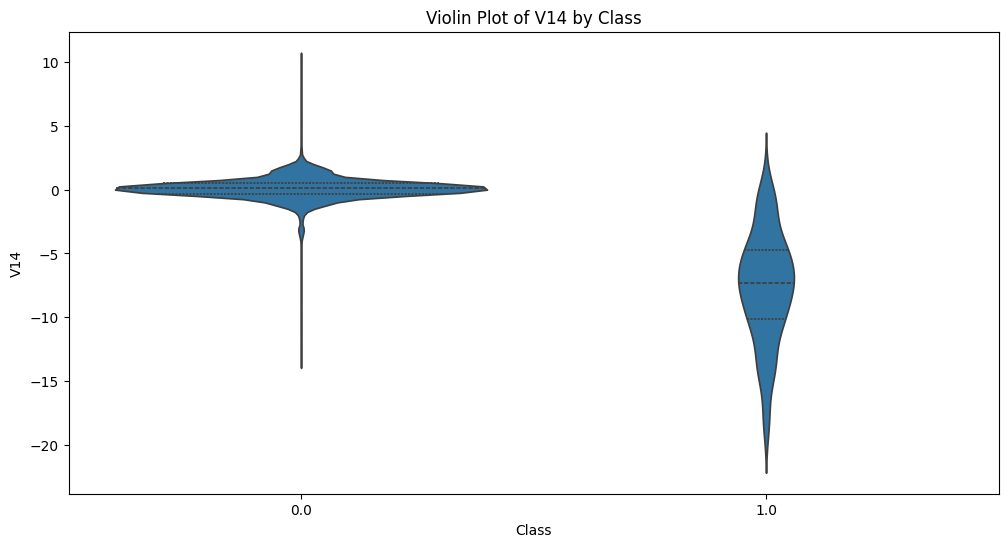

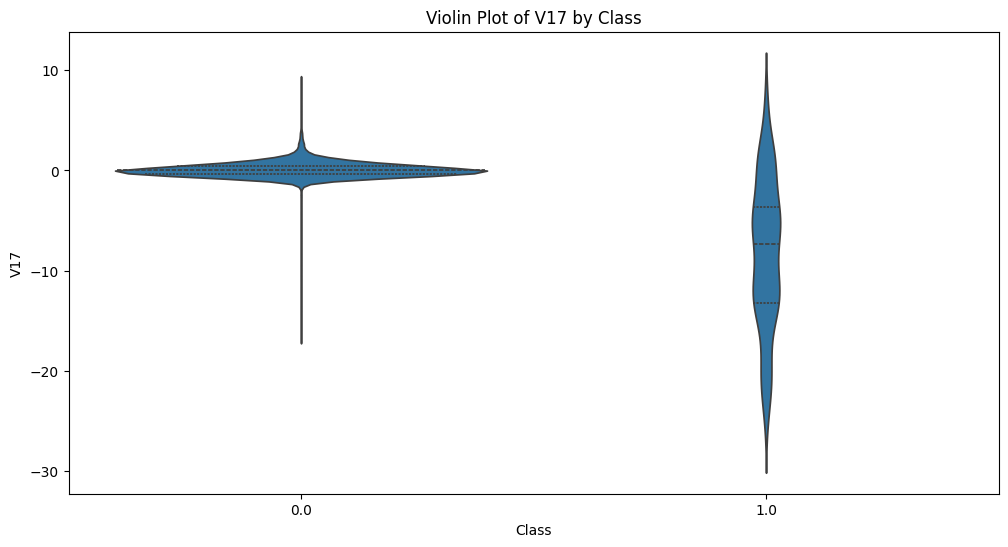

In [27]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Class', y='V14', data=df, inner='quartile')
plt.title('Violin Plot of V14 by Class')
plt.show()
plt.figure(figsize=(12,6))
sns.violinplot(x='Class', y='V17', data=df, inner='quartile')
plt.title('Violin Plot of V17 by Class')
plt.show()

## 19. Anomaly Score Distribution (Isolation Forest)

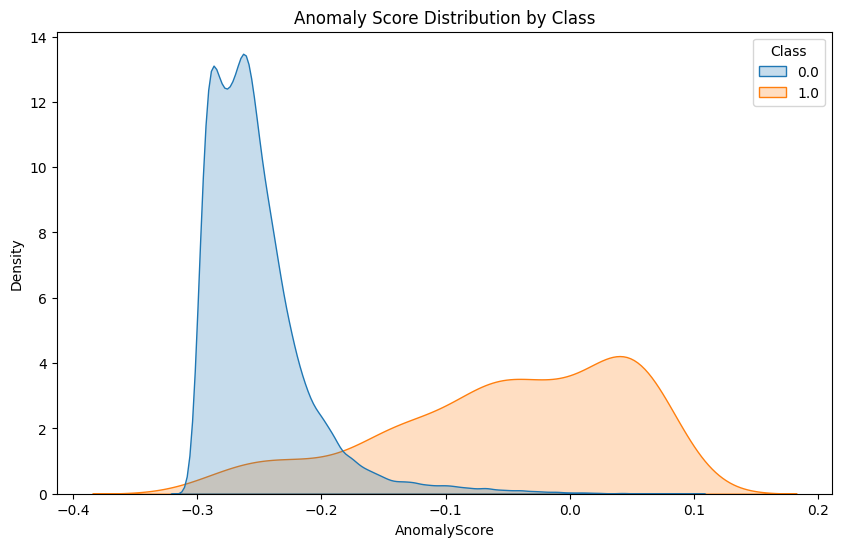

In [30]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Fit Isolation Forest on features + engineered columns
features = df[[f'V{i}' for i in range(1, 29)] + ['LogAmount', 'Time']]

iso = IsolationForest(
    n_estimators=100,
    contamination=df['Class'].mean(),
    random_state=42
)
iso.fit(features)

# Compute anomaly score and add to DataFrame
df['AnomalyScore'] = -iso.decision_function(features)

# Plot the anomaly score distribution by class
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x='AnomalyScore',
    hue='Class',
    fill=True,
    common_norm=False
)
plt.title('Anomaly Score Distribution by Class')
plt.show()

## 20. ROC and Precision-Recall Curves for Isolation Forest Scores

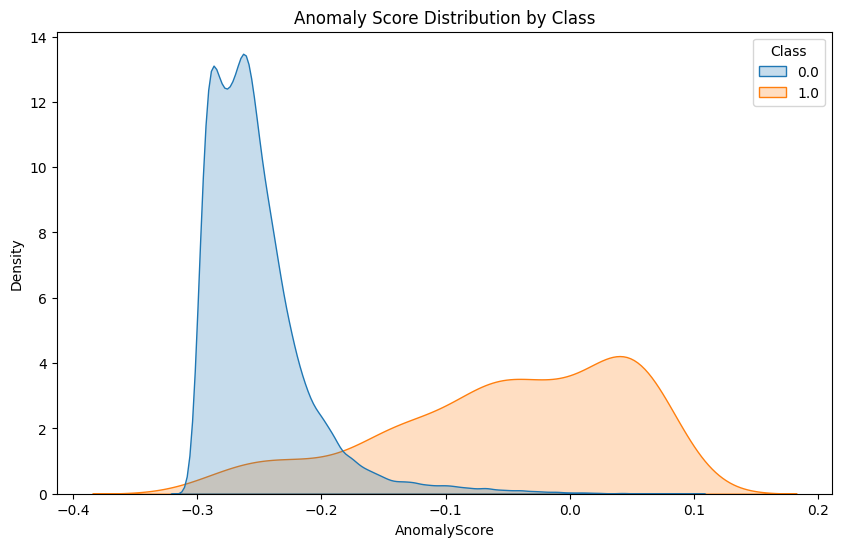

In [31]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Fit Isolation Forest on features + engineered columns
features = df[[f'V{i}' for i in range(1, 29)] + ['LogAmount', 'Time']]

iso = IsolationForest(
    n_estimators=100,
    contamination=df['Class'].mean(),
    random_state=42
)
iso.fit(features)

# Compute anomaly scores and add to DataFrame
df['AnomalyScore'] = -iso.decision_function(features)

# Plot the anomaly score distribution by class
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x='AnomalyScore',
    hue='Class',
    fill=True,
    common_norm=False
)
plt.title('Anomaly Score Distribution by Class')
plt.show()

## Data Cleaning
Remove duplicates and impute any missing values.

In [ ]:
import pandas as pd
# Drop duplicate transactions
df.drop_duplicates(inplace=True)
# Check and fill missing values (forward-fill)
df.fillna(method='ffill', inplace=True)
# Verify no missing values remain
print('Missing values after cleaning:')
print(df.isnull().sum())

## Outlier Analysis
Identify and quantify outliers using the IQR method.

In [23]:
import numpy as np
import pandas as pd
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['Class']).columns
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    outlier_summary[col] = int(is_outlier.sum())
pd.Series(outlier_summary).sort_values(ascending=False).head(10)

V28       17764
V27       14038
Amount    10222
V20        9896
V8         8467
V23        8076
V6         7766
V21        6172
V5         5823
V12        5661
dtype: int64

## Feature Engineering
Create new time-based and amount-based features.

In [24]:
import pandas as pd
import numpy as np
# Extract hour and minute of day from Time (seconds)
df['Hour_of_Day'] = ((df['Time'] // 3600) % 24).astype(int)
df['Minute_of_Hour'] = ((df['Time'] % 3600) // 60).astype(int)
# Create amount bins (deciles)
df['Amount_Decile'] = pd.qcut(df['LogAmount'], 10, labels=False)
# Interaction feature example: V1 + V2
df['V1_plus_V2'] = df['V1'] + df['V2']
# Display new feature overview
df[['Hour_of_Day','Minute_of_Hour','Amount_Decile','V1_plus_V2']].head()

Hour_of_Day  Minute_of_Hour  Amount_Decile  V1_plus_V2
0            0               0            8.0   -1.432588
1            0               0            1.0    1.458008
2            0               0            9.0   -2.698517
3            0               0            8.0   -1.151498
4            0               0            7.0   -0.280496